In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")


In [3]:
#Load dataset

df = pd.read_csv("wineQT.csv")

print("First 5 rows of dataset:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())

First 5 rows of dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.

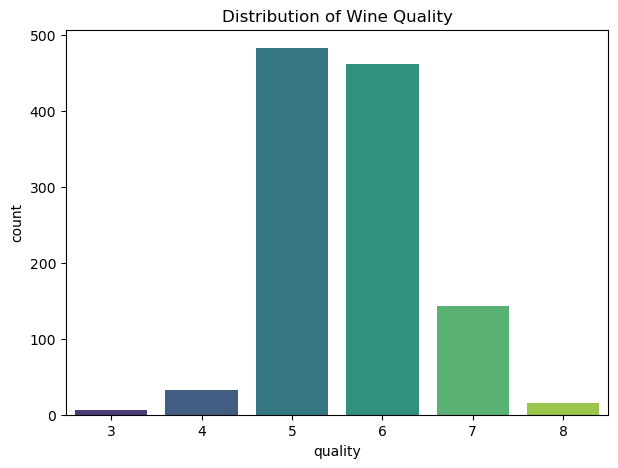

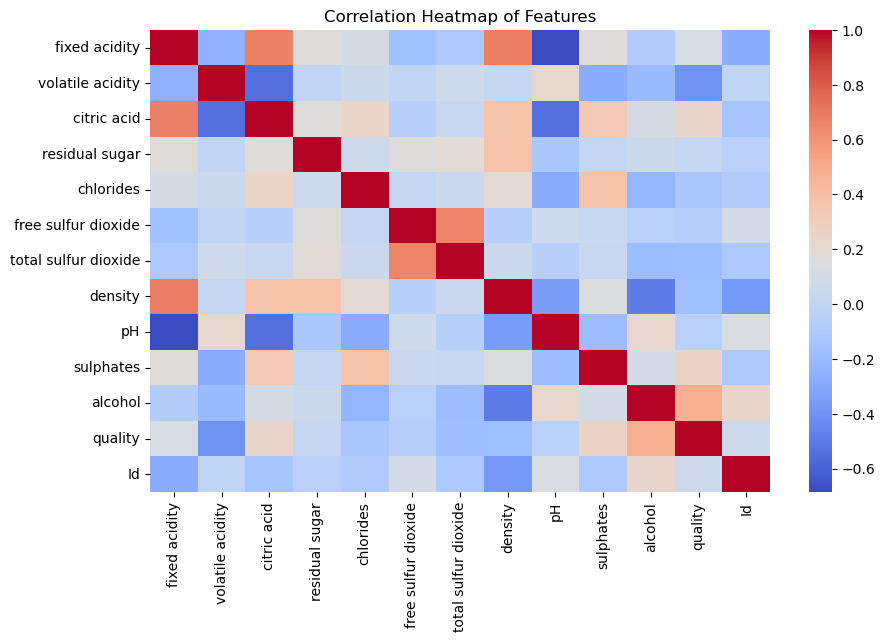

In [4]:
#Distribution of wine quality
plt.figure(figsize=(7,5))
sns.countplot(x='quality', data=df, palette="viridis")
plt.title("Distribution of Wine Quality")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap of Features")
plt.show()

In [5]:
#Data Processing
X = df.drop('quality', axis=1)   # features
y = df['quality']                # target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


===== Random Forest =====
Accuracy: 0.6899563318777293
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.73      0.75      0.74        96
           6       0.64      0.71      0.67        99
           7       0.76      0.62      0.68        26
           8       0.00      0.00      0.00         2

    accuracy                           0.69       229
   macro avg       0.43      0.41      0.42       229
weighted avg       0.67      0.69      0.68       229



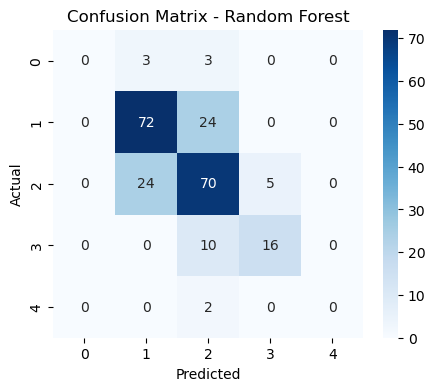


===== SGD Classifier =====
Accuracy: 0.5851528384279476
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.68      0.78      0.73        96
           6       0.66      0.39      0.49        99
           7       0.34      0.77      0.47        26
           8       0.00      0.00      0.00         2

    accuracy                           0.59       229
   macro avg       0.34      0.39      0.34       229
weighted avg       0.61      0.59      0.57       229



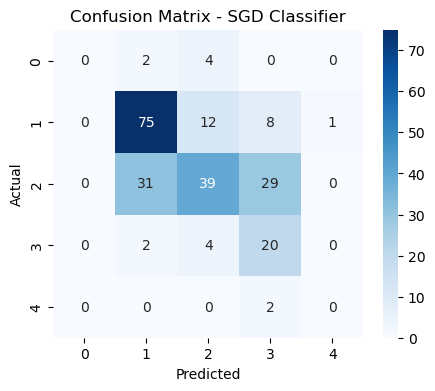


===== SVC =====
Accuracy: 0.6550218340611353
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.70      0.75      0.72        96
           6       0.61      0.70      0.65        99
           7       0.69      0.35      0.46        26
           8       0.00      0.00      0.00         2

    accuracy                           0.66       229
   macro avg       0.40      0.36      0.37       229
weighted avg       0.64      0.66      0.64       229



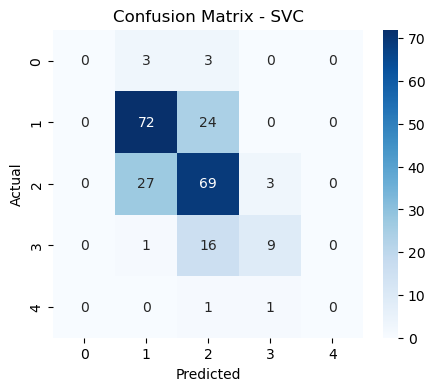

In [7]:
#Train Models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "SGD Classifier": SGDClassifier(random_state=42),
    "SVC": SVC(random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    
    print(f"\n===== {name} =====")
    print("Accuracy:", acc)
    print(classification_report(y_test, y_pred))
    
    # Confusion matrix heatmap
    plt.figure(figsize=(5,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt="d")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


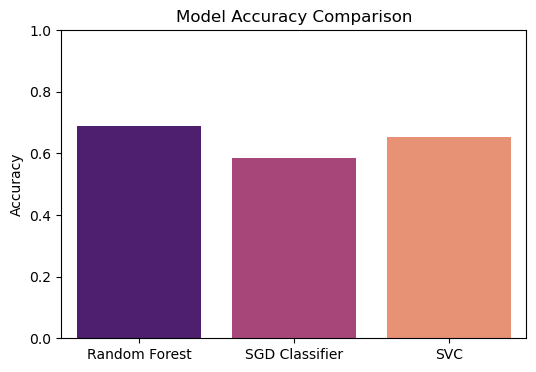

In [8]:
#Compare Models

plt.figure(figsize=(6,4))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette="magma")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.show()
